## Solution of Partial Differential Equations using Finite Differences

<div style="text-align: right">S Gautam, November 2022</div>

## Example Problems

### Diffusion Problem of Porous Catalyst

In chemical engineering the unsteady reaction diffiusion problem in a spherical porous catalyst particle is described by:

$$ \frac{\partial c}{\partial t} = \frac{1}{r^2} \frac{\partial}{\partial r} (Dr^2 \frac{\partial c}{\partial r}) - \mathbb{R}(c) $$

$$ r = 0 : \frac{\partial c}{\partial r} = 0 $$

$$ r = R : -D \frac{\partial c}{\partial r} = k_s (c - c_0) $$

$$ t = 0 : c = 0 $$

To solve this problen we will have to discretize the the position variable ($r$). After this, we integrate along time axis using Euler or Crank-Nicholson.

### Tubular Reactor

The steady state emodel equations for a tubular reactor with the reaction mass flowing laminarly are: 

$$ 2 \bar v (1 - \frac{r^2}{R^2}) \frac{\partial c}{\partial z} = \mathbb{R} (c, T) $$

$$ 2\bar v (1 - \frac{r^2}{R^2}) \rho C_p \frac{\partial T}{\partial z} = \frac{k}{r}\frac{\partial}{\partial r}(r \frac{\partial T}{\partial r}) + \rho(-\Delta H_r) \mathbb{R}(c, t) $$

Boundary conditions are as follows:

$$ r = 0 : \frac{\partial T}{\partial r} = 0 $$

$$ r = R : -k \frac{\partial T}{\partial r} = U(T - T_j) $$

Initial value conditions are as follows:

$$ z = 0 : c = c_0, T = T_0 $$

Here $ c $ and $ T $ are the concentration of the reactant and the temperature, $ \bar v $ is the mean velocity of the reaction mass in the tubular reactor of radius $ R, r $ and $ z $ are the radial and axial locations, $ \mathbb{R} (c, T) $ is the rate of depletion of the reactant ($ [ = ck^{*}_{0} \exp{(-\frac{E}{RT})} ] $  for a first order irreversible reaction, A $\rightarrow$ products )

## Problem 1

Apply the Finite Difference technique and the Crank-Nicholson method to the dimensionless diffusion equation:

$$ \frac{\partial c}{\partial t} = \frac{\partial ^2 c}{\partial x^2} $$

With the conditions:

$$ c(0, t) = c(1,t) = 0 $$

$$ c(x, 0) = 1 $$

We discretize $\frac{\partial c}{\partial t}$ as:

$$ \frac{\partial c_{ij}}{\partial t} = \frac{c_{i, j+1} - c_{i, j}}{\Delta t} $$

And $\frac{\partial^2 c}{\partial x^2}$ as:

$$ \frac{\partial^2 c_{ij}}{\partial x^2} = \frac{c_{i+1,j} - 2 c_{ij} + c_{i-1,j}}{(\Delta x)^2} $$

The equation now becometh the matrix equation:

$$
\begin{bmatrix}
\frac{dc_{2}}{dt}\\
\frac{dc_{3}}{dt}\\
\frac{dc_{4}}{dt}\\
...\\
\frac{dc_{N}}{dt}\\
\end{bmatrix}
=
\frac{1}{(\Delta x)^2}
\begin{bmatrix}
-2 && 1 && 0 && 0 && 0 && ... && 0 && 0 && 0\\
0 && 1 && -2 && 1 && 0 && ... && 0 && 0 && 0 \\
0 && 0 && 1 && -2 && 1 && ... && 0 && 0 && 0 \\
...\\
0 && 0 && 0 && 0 && 0 && ... && 0 && 1 && -2 \\
\end{bmatrix}
\begin{bmatrix}
c_2 \\
c_3 \\
c_4 \\
... \\
c_N
\end{bmatrix}
$$

We can say that:

$$ \frac{c_{i, j+1} - c_{i, j}}{\Delta t}  =  \frac{c_{i+1,j} - 2 c_{ij} + c_{i-1,j}}{(\Delta x)^2}$$

$$ c_{i, j+1} = c_{i, j} + \frac{\Delta t}{(\Delta x)^2}({c_{i+1,j} - 2 c_{ij} + c_{i-1,j}}) $$

This is called the <i>Euler scheme</i>, the <i>Crank-Nicholson scheme</i> uses the average of both the current and the next time step and is an implicit equation. We'll stick with the Euler scheme for this simple problem.


This essentially amounts to solving the matrix equation:

$$
\begin{bmatrix}
c_{2, j+1}\\
c_{3, j+1}\\
c_{4, j+1}\\
...\\
c_{N, j+1}\\
\end{bmatrix}
=
\begin{bmatrix}
c_{2, j}\\
c_{3, j}\\
c_{4, j}\\
...\\
c_{N, j}\\
\end{bmatrix}
+
\frac{\Delta t}{(\Delta x)^2}
\begin{bmatrix}
-2 && 1 && 0 && 0 && 0 && ... && 0 && 0 && 0\\
1 && -2 && 1 && 0 && 0 && ... && 0 && 0 && 0 \\
0 && 1 && -2 && 1 && 0 && ... && 0 && 0 && 0 \\
...\\
0 && 0 && 0 && 0 && 0 && ... && 0 && 1 && -2 \\
\end{bmatrix}
\begin{bmatrix}
c_{2, j} \\
c_{3, j} \\
c_{4, j} \\
... \\
c_{N, j}
\end{bmatrix}
$$

## Algorithm

1. Create 2 dimensional grid with appropriate ${\Delta t}$ and ${\Delta x}$. 
2. Initialize boundary conditions at $t = 0$.
3. Solve the equation for each point looping through x, and t.

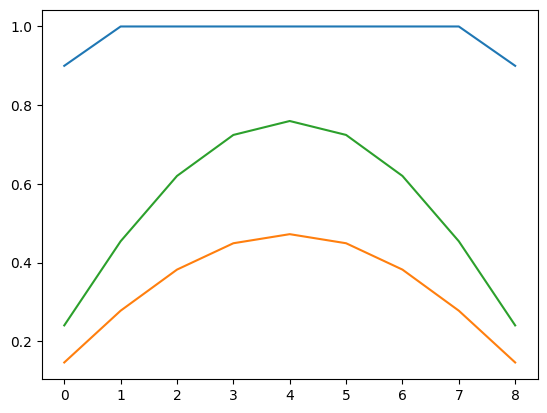

In [40]:
import numpy as np
import matplotlib.pyplot as plt

N = 10

delta_x = (1)/N
delta_t = 1/1000.0

# we want to see the result after one second
final_t = 0.1
t_iterations = int(final_t / delta_t)

solutions = []
c = np.array([1 for _ in range(N - 1)])

def construct_tdm(N):
    # Construct tridiagonal matrix
    tdm = np.zeros((N-1, N-1))

    for i in range(N-1):
        for j in range(N-1):
            if((i - 1) == j and i != 0 and i < N - 2):
                tdm[i][j] = 1
                tdm[i][j+1] = -2
                tdm[i][j+2] = 1

    tdm[0][0] = -2
    tdm[0][1] = 1
    tdm[N-2][N-3] = 1
    tdm[N-2][N-2] = -2
    return tdm

for t in range(0, t_iterations):
    c = c + ((delta_t) / (delta_x)**2) * np.matmul(construct_tdm(N), c)
    solutions.append(c)

plt.plot([k for k in range(0, 9)], solutions[0])
plt.plot([k for k in range(0, 9)], solutions[-1])
plt.plot([k for k in range(0, 9)], solutions[int(t_iterations/2)])